In [1]:
## Plotting the trace of contact fabric tensor

import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
import sys

In [2]:
# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  12,
  "ytick.labelsize":  12,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

In [3]:
def interactionsList(interactionFile):
    '''
    This function reads the interaction file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: interactionFile - the location of the interaction data file
    '''

    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[27:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    interactionFile.close()
    return contactList  

<function matplotlib.pyplot.show(close=None, block=None)>

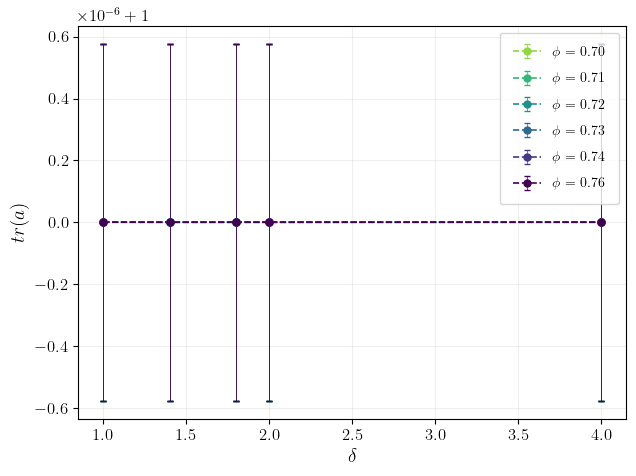

In [8]:
# Simulation data mount point.
topDir        = "/media/rahul/Rahul_2TB/high_bidispersity/"
fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

# Relevant file names to read.
ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

# Some simulation parameters.

phi = [0.70,0.71,0.72,0.73,0.74,0.76]

run = {500:8, 1000:4, 2000:2, 4000:1}

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phii = 0.75
'''
This function plots the contact angle histogram for all particles in the system and all ar values.
Plots is Ec vs theta, with one curve for each ar value for one phi value.

input: phii - value for one single 
'''

#plt.clf()
cmap = matplotlib.colormaps['viridis_r'] #color scheme

npp  = 1000
off  = 100
phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)

for j in range(len(phi)):
    phii=phi[j]
    phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    
    alpha = []
    errAlpha = []
    for k in range(len(ar)):
        traceMat = []
        offDia   = []
        dataname            = topDir+'NP_'+str(npp)+'/phi_'+phii+'/ar_'+str(ar[k])+'/Vr_0.5'
        for l in range (run[npp]):
            interFile   = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
            contactList = interactionsList(interFile)

            for sampleList in contactList[off:]:
                for i in range (sampleList.shape[0]):
                    if int(sampleList[i,10]) == 2:
                        normVec = [sampleList[i,2],sampleList[i,4]]
                        fabTen = np.outer(normVec, normVec)
                        trace1  = np.matrix.trace(fabTen)
                        offVal = fabTen[0][1]

                        traceMat.append(trace1)
                        #offDia.append(offVal)

        alpha.append(np.mean(traceMat))
        errAlpha.append(np.std(traceMat))

    plt.errorbar(ar, alpha, yerr=errAlpha, fmt='--o', label=r'$\phi$' + f' = {phii}', color=cmap((j+1)/len(phi)), capsize=2, linewidth=1.2, elinewidth=0.5)

plt.grid(which='Both', alpha=0.2)

#plt.title(fr"$\phi = {phii}$", fontsize=18)
plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$tr(a)$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.legend(fontsize=10, loc = 'upper right', labelspacing = 1, borderpad = 1)

plt.tight_layout()

if True:
    figFormat     = ".pdf"
    plt.savefig(fig_save_path+'traceOfContactStresslet' + '_NP_' + str(1000) + '_phi_' + str(phii) + figFormat, bbox_inches = "tight", dpi = 500)
plt.show

/tmp/ipykernel_466895/2144397059.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)
/tmp/ipykernel_466895/2144397059.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10, loc = 'upper right', labelspacing = 1, borderpad = 1)


<function matplotlib.pyplot.show(close=None, block=None)>

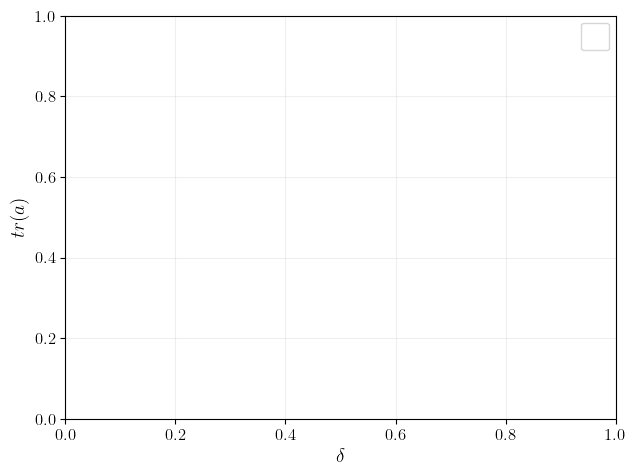

In [4]:
fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

In [5]:
fig_save_path+'traceOfContactStresslet' + '_NP_' + str(1000) 

'/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/traceOfContactStresslet_NP_1000'